In [1]:
# SK hynix 1day prediction
# training - 90%
# test     - 10%

In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import math

# Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

# Linear Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Metric
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

/Users/mokpolar/Documents/GitHub: ['gcp-functions-mnist-example', 'iterm', 'week2_eda_examples.ipynb', 'ApplicationInspector', 'skmarketsensing', 'mokpolar.github.io_hyunjin', '.DS_Store', 'minimal-mistakes', 'docker_study', 'Crawl_DeepSearch', 'data-science-on-gcp', 'handson-ml', 'FluentPython', 'KRX_semiconductor_index_prediction', 'mokpolar.github.io_backup.textClipping', 'mokpolar.github.io', 'crawl_trade', 'Kaggle_House-Prices_Advanced_Regression_Techniques', 'kaggle_ny_taxi', 'week2edadata.py', 'deep-learning-from-scratch', 'serverless-machine-learning', 'value-based-deep-reinforcement-learning-trading-model-in-pytorch', '.ipynb_checkpoints', 'deep-RL-trading', 'pyweb', '.vscode', 'TensorFlow-Tutorials', 'how_to_win_data_science_competition']
/Users/mokpolar/Documents/GitHub/KRX_semiconductor_index_prediction: ['Untitled Folder', 'widespreading_bloomberg_semicunductor_raw.ipynb', 'bloomberg_smc_describe.xlsx', 'vol_result_1day.dat', 'bloomberg_dataprocessing.ipynb', 'bloomberg_to

In [2]:
# import data
original_df = pd.read_csv("./preprocessed_data.csv", index_col = 0)
original_df.info()
original_df.head()

# number of different stocks
print('\nnumber of different stocks: ', len(list(set(original_df.columns))))
print(list(set(original_df.columns))[:10])

FileNotFoundError: [Errno 2] File b'./preprocessed_data.csv' does not exist: b'./preprocessed_data.csv'

##### Set date interval

In [4]:
# 사용할 data 범위 지정
# index = date
df = original_df.loc['2006-01-01':'2019-12-31'].copy() # 날짜로 indexing

In [5]:
df.head()

,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,GDPCPCECIndex,...,QCOM_product,SamsungElectronics_product,ShinEtsuChemical_product,Siltronic_product,SKhynix_product,Sumco_product,TokyoElectron_product,TSMC_product,UMC_product,SKhynix_1year_change
date,,,,,,,,,,,,,,,,,,,,,
2006-01-02,5.4,3.4,4.5,6.1,5.2,102.7,13603.93,6.6,2.8,2.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.755319
2006-01-03,5.4,3.4,4.5,6.1,5.2,102.7,13603.93,6.6,2.8,2.3,...,1.000000,0.862009,1.0,1.0,1.048766,1.0,1.000000,1.000000,1.000000,-15.748031
2006-01-04,5.4,3.4,4.5,6.1,5.2,102.7,13603.93,6.6,2.8,2.3,...,1.097724,2.307115,1.0,1.0,1.549763,1.0,1.000000,0.788606,0.581332,-9.003928
2006-01-05,5.4,3.4,4.5,6.1,5.2,102.7,13603.93,6.6,2.8,2.3,...,0.642743,0.878133,1.0,1.0,0.913503,1.0,4.149537,0.835657,2.780952,-8.224640
2006-01-06,5.4,3.4,4.5,6.1,5.2,102.7,13603.93,6.6,2.8,2.3,...,2.572150,0.504080,1.0,1.0,0.596882,1.0,1.117321,1.553101,1.545230,-9.700428


In [6]:
df.tail()

,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,GDPCPCECIndex,...,QCOM_product,SamsungElectronics_product,ShinEtsuChemical_product,Siltronic_product,SKhynix_product,Sumco_product,TokyoElectron_product,TSMC_product,UMC_product,SKhynix_1year_change
date,,,,,,,,,,,,,,,,,,,,,
2019-10-27,1.9,2.0,2.9,-1.5,2.0,69.0,21525.82,3.7,1.7,2.2,...,1.223596,-7.016632,1.443049,0.882592,0.724875,0.591650,1.185079,0.728242,8.957344,NaN
2019-10-28,1.9,2.0,2.9,-1.5,2.0,69.0,21525.82,3.7,1.7,2.2,...,0.869484,3.268112,0.911087,0.984864,0.598464,0.436636,1.103782,1.596400,-4.887075,NaN
2019-10-29,1.9,2.0,2.9,-1.5,2.0,69.0,21525.82,3.7,1.7,2.2,...,0.493114,1.174228,0.410159,1.089446,0.832789,1.231150,1.131356,1.864625,2.523049,NaN
2019-10-30,1.9,2.0,2.9,-1.5,2.0,69.0,21525.82,3.7,1.7,2.2,...,0.793448,1.165541,0.758679,1.083804,1.150234,0.694483,1.647300,0.877406,0.370442,NaN
2019-10-31,1.9,2.0,2.9,-1.5,2.0,69.0,21525.82,3.7,1.7,2.2,...,1.415651,1.150159,2.028561,1.141342,1.033135,1.118354,1.453485,1.324952,2.656823,NaN


In [7]:
df.describe()

,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,GDPCPCECIndex,...,QCOM_product,SamsungElectronics_product,ShinEtsuChemical_product,Siltronic_product,SKhynix_product,Sumco_product,TokyoElectron_product,TSMC_product,UMC_product,SKhynix_1year_change
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,...,5050.000000,5049.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,4852.000000
mean,1.788926,1.790495,2.029554,2.440194,0.742611,42.926972,16795.867729,3.646986,1.790346,1.693281,...,1.100675,inf,1.374201,1.060488,1.537543,112.282938,1.270435,1.099742,1.236583,9.215802
std,2.262614,1.604976,1.760203,12.528327,2.526670,80.739549,2306.821699,1.980809,0.906368,0.566989,...,3.712686,NaN,8.952783,1.244131,37.150486,7871.320835,10.033498,1.345591,9.390434,34.250818
min,-8.427740,-3.929278,-4.164645,-40.556915,-5.638326,-260.775860,13603.930000,-3.371626,-0.526922,-0.037210,...,-138.040745,-151.311218,-352.165117,-44.624416,-197.801656,-95.364336,-92.707408,-22.994370,-103.968863,-79.965753
25%,1.005899,1.486290,1.108062,-3.808043,-0.945035,15.769822,14678.015125,3.160622,1.385332,1.351686,...,0.819923,0.820128,0.659224,1.000000,0.787133,0.933921,0.681987,0.786654,0.668890,-12.438629
50%,2.164966,2.129855,2.332657,2.675525,0.986007,57.250528,16312.190280,4.055910,1.811020,1.697225,...,0.988756,0.988058,1.000000,1.000000,0.980922,1.000000,0.974422,0.995972,0.979366,7.172692
75%,3.037282,2.677716,3.140396,8.323460,2.609342,95.275917,18527.810675,4.741951,2.363128,2.081962,...,1.203162,1.206287,1.286164,1.000000,1.231116,1.013588,1.375534,1.248112,1.369591,26.945240
max,6.404840,4.026240,5.231817,42.400000,6.177670,178.679746,21525.820000,6.846491,4.254906,2.912975,...,192.333213,inf,298.702850,37.861962,2632.701239,559362.418600,670.654218,75.658581,638.294790,169.490080


In [8]:
df.info(verbose=True) # verbose True 이거 재밌네 이렇게 나오나

<class 'pandas.core.frame.DataFrame'>
Index: 5051 entries, 2006-01-02 to 2019-10-31
Data columns (total 1139 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    GDPCQOQIndex                    float64
 1    GDPCYOYIndex                    float64
 2    GDPCTOT%Index                   float64
 3    GPDITOC%Index                   float64
 4    GPGSTOC%Index                   float64
 5    RGCDCIPIIndex                   float64
 6    GDPCUR$Index                    float64
 7    GDPCURYIndex                    float64
 8    GDPPIQQIndex                    float64
 9    GDPCPCECIndex                   float64
 10   CPIYOYIndex                     float64
 11   CPIXYOYIndex                    float64
 12   PCEDEFYIndex                    float64
 13   PCECYOYIndex                    float64
 14   CPICHNGIndex                    float64
 15   CPUPXCHGIndex                   float64
 16   FDIDFDMOIndex                   float64
 17   F

##### plotting target data

In [9]:
plotting_df = df.copy()
plotting_df.reset_index(drop=True, inplace=True)

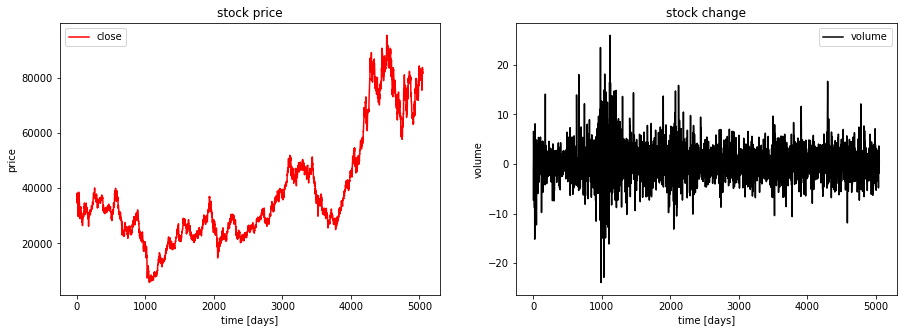

In [10]:
# plotting target stock price # 이건 그냥 그린거고
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(plotting_df['SKhynix_close'], color='red', label='close')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(plotting_df['SKhynix_change'], color='black', label='volume')
plt.title('stock change')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

##### define scaling function

In [11]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler() # minmax scaler 객체 생성
    for column in df.columns: # df로 받은 데이터프레임 컬럼들을 다 읽어들어가며
        df[column] = min_max_scaler.fit_transform(np.array(df[column]).reshape(-1, 1)) # reshape로 한줄로 만들어서 numpy array로 만든 다음 transforming
    return df # 해당 컬럼에 변형해서 박아넣은다음에 dataframe return 

# function for standarad scaling of stock
def standard_scaler(df):
    df = StandardScaler().fit_transform(df)
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, target, seq_len):
    # data frame -> 2D array
    data_raw = stock.values # convert to numpy array
    target_raw = target.values
    data = []
    target_data = []
    
    # create all possible sequences of length seq_len
    # seq_len만큼씩 window 만들기
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
        target_data.append(target_raw[index: index + seq_len])
    
    # list -> array
    data = np.array(data);
    target_data = np.array(target_data);
    # 전체 data 중 10%를 분리(test dataset)
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = target_data[:train_set_size,-1]
    
    x_test = data[train_set_size:,:-1,:]
    y_test = target_data[train_set_size:,-1]
    
    return [x_train, y_train, x_test, y_test]

##### seperate target data

In [12]:
# choose one stock
df_stock = df.copy()
cols = list(df_stock.columns.values)

# 예상치 못한 error가 발생하여 삭제
df_stock.drop('SamsungElectronics_product', axis=1, inplace=True)

# remove unusing data
df_stock.drop(['option_bit', 'future_bit'], axis=1, inplace=True)

df_stock

,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,GDPCPCECIndex,...,Philadelphia_product,QCOM_product,ShinEtsuChemical_product,Siltronic_product,SKhynix_product,Sumco_product,TokyoElectron_product,TSMC_product,UMC_product,SKhynix_1year_change
date,,,,,,,,,,,,,,,,,,,,,
2006-01-02,5.4,3.4,4.5,6.1,5.2,102.7,13603.93,6.6,2.8,2.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.755319
2006-01-03,5.4,3.4,4.5,6.1,5.2,102.7,13603.93,6.6,2.8,2.3,...,1.000000,1.000000,1.000000,1.000000,1.048766,1.000000,1.000000,1.000000,1.000000,-15.748031
2006-01-04,5.4,3.4,4.5,6.1,5.2,102.7,13603.93,6.6,2.8,2.3,...,0.967923,1.097724,1.000000,1.000000,1.549763,1.000000,1.000000,0.788606,0.581332,-9.003928
2006-01-05,5.4,3.4,4.5,6.1,5.2,102.7,13603.93,6.6,2.8,2.3,...,1.168471,0.642743,1.000000,1.000000,0.913503,1.000000,4.149537,0.835657,2.780952,-8.224640
2006-01-06,5.4,3.4,4.5,6.1,5.2,102.7,13603.93,6.6,2.8,2.3,...,1.047620,2.572150,1.000000,1.000000,0.596882,1.000000,1.117321,1.553101,1.545230,-9.700428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-27,1.9,2.0,2.9,-1.5,2.0,69.0,21525.82,3.7,1.7,2.2,...,0.954025,1.223596,1.443049,0.882592,0.724875,0.591650,1.185079,0.728242,8.957344,NaN
2019-10-28,1.9,2.0,2.9,-1.5,2.0,69.0,21525.82,3.7,1.7,2.2,...,0.988696,0.869484,0.911087,0.984864,0.598464,0.436636,1.103782,1.596400,-4.887075,NaN
2019-10-29,1.9,2.0,2.9,-1.5,2.0,69.0,21525.82,3.7,1.7,2.2,...,1.023202,0.493114,0.410159,1.089446,0.832789,1.231150,1.131356,1.864625,2.523049,NaN


In [13]:
# data scaling
df_stock_norm = df_stock.copy()

# normalization
# df_stock_norm = normalize_data(df_stock_norm)

# standard scaler
df_columns = list(df_stock_norm.columns)
df_stock_norm = standard_scaler(df_stock_norm)
df_stock_norm = pd.DataFrame(df_stock_norm, columns = df_columns)

In [14]:
# seperate target data
target_df = df_stock_norm[['SKhynix_change']]

# shift 1 day
target_df['SKhynix_change'] = target_df['SKhynix_change'].shift(-1*int(1))

target_df

C:\Users\Seungwon\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,SKhynix_change
0,0.360736
1,-2.167786
2,-0.603481
3,0.351997
4,0.818251
...,...
5046,-0.026699
5047,0.008258
5048,-0.553960
5049,0.150997


In [15]:
# shift를 하여 발생하는 nan 제거
target_df.drop([(len(target_df) - 1)], inplace=True)
df_stock_norm.drop([(len(df_stock_norm) - 1)], inplace=True)

# drop target data from feature data
df_stock_norm.drop('SKhynix_change', axis=1, inplace=True)

# filling na cell
df_stock_norm.fillna(method='ffill', inplace=True)
df_stock_norm.fillna(method='bfill', inplace=True)

C:\Users\Seungwon\AppData\Local\Continuum\miniconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
target_df

,SKhynix_change
0,0.360736
1,-2.167786
2,-0.603481
3,0.351997
4,0.818251
...,...
5045,0.124605
5046,-0.026699
5047,0.008258
5048,-0.553960


In [17]:
df_stock_norm

,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,GDPCPCECIndex,...,Philadelphia_product,QCOM_product,ShinEtsuChemical_product,Siltronic_product,SKhynix_product,Sumco_product,TokyoElectron_product,TSMC_product,UMC_product,SKhynix_1year_change
0,1.596132,1.002921,1.403640,0.292151,1.764310,0.740392,-1.383832,1.490960,1.114066,1.070179,...,-0.101557,-0.027119,-0.041801,-0.048624,-0.013158,-0.014139,-0.026956,-0.074132,-0.025197,-0.758341
1,1.596132,1.002921,1.403640,0.292151,1.764310,0.740392,-1.383832,1.490960,1.114066,1.070179,...,-0.101557,-0.027119,-0.041801,-0.048624,-0.013158,-0.014139,-0.026956,-0.074132,-0.025197,-0.728929
2,1.596132,1.002921,1.403640,0.292151,1.764310,0.740392,-1.383832,1.490960,1.114066,1.070179,...,-0.224425,-0.000795,-0.041801,-0.048624,0.000329,-0.014139,-0.026956,-0.231249,-0.069785,-0.532005
3,1.596132,1.002921,1.403640,0.292151,1.764310,0.740392,-1.383832,1.490960,1.114066,1.070179,...,0.543750,-0.123355,-0.041801,-0.048624,-0.016799,-0.014139,0.286977,-0.196279,0.164478,-0.509250
4,1.596132,1.002921,1.403640,0.292151,1.764310,0.740392,-1.383832,1.490960,1.114066,1.070179,...,0.080846,0.396376,-0.041801,-0.048624,-0.025323,-0.014139,-0.015262,0.336956,0.032871,-0.552342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,0.049096,0.130548,0.494563,-0.314534,0.497696,0.322960,2.050623,0.026766,-0.099689,0.893791,...,-0.186062,0.092448,0.067606,-0.186268,-0.012371,-0.014117,-0.014891,-0.300067,-0.133441,-0.184832
5046,0.049096,0.130548,0.494563,-0.314534,0.497696,0.322960,2.050623,0.026766,-0.099689,0.893791,...,-0.277658,0.033112,0.007691,-0.143003,-0.021877,-0.014191,-0.008508,-0.276114,0.822276,-0.184832
5047,0.049096,0.130548,0.494563,-0.314534,0.497696,0.322960,2.050623,0.026766,-0.099689,0.893791,...,-0.144856,-0.062277,-0.051734,-0.060791,-0.025280,-0.014211,-0.016611,0.369137,-0.652181,-0.184832
5048,0.049096,0.130548,0.494563,-0.314534,0.497696,0.322960,2.050623,0.026766,-0.099689,0.893791,...,-0.012684,-0.163661,-0.107691,0.023278,-0.018972,-0.014110,-0.013863,0.568493,0.137011,-0.184832


In [18]:
df_stock_norm.isna().sum().sum()

0

In [19]:
target_df.isna().sum()

SKhynix_change    0
dtype: int64

##### column 분리

In [20]:
finance_column = ['liability_rate', 'operating_profit_increase_rate', 'net_profit_increase_rate',
                  'tangible_asset_increase_rate', 'operating_profit_rate', 'profit_cost_rate',
                  'ROA_profit', 'ROA_net_profit', 'ROE_profit', 'ROE_net_profit', 'per', 'pbr', 'psr']
memory_price_column = ['memory_price', 'g2', 'g4', 'g8', 'g16', 'g32', 'g64', 'g128', 'avg', 'avg_four',
                       'ssd_price', 'flash_price']

In [21]:
# stock column 추출
stock_column = []
for column in df_stock_norm.columns:
    if 'close' in column:
        stock_column.append(column)
    elif 'volume' in column:
        stock_column.append(column)
    elif 'change' in column:
        stock_column.append(column)
    elif 'product' in column:
        stock_column.append(column)

# bloomberg column 추출
bloomberg_column = []
for column in df_stock_norm.columns:
    if column == 'Amazon_close':
        break
    bloomberg_column.append(column)

# etc column 추출
# flash column 이후 column을 모두 etc column으로 분류
etc_column = []
flash_price_bit = 0
for column in df_stock_norm.columns:
    if flash_price_bit == 0:
        if column == 'flash_price':
            flash_price_bit = 1
        continue
    else:
        if column not in stock_column:
            etc_column.append(column)

##### feature로 사용할 데이터 추출

In [22]:
# 사용할 데이터만 남기고 모두 drop
# bloomberg_column, stcok_column, finance_column, memory_price_column, etc_column

df_stock_norm.drop(bloomberg_column, axis=1, inplace=True)
# df_stock_norm.drop(stock_column, axis=1, inplace=True)
df_stock_norm.drop(finance_column, axis=1, inplace=True)
df_stock_norm.drop(memory_price_column, axis=1, inplace=True)
df_stock_norm.drop(etc_column, axis=1, inplace=True)
df_stock_norm

,Amazon_close,Amazon_volume,Amazon_change,AMD_close,AMD_volume,AMD_change,APPLE_close,APPLE_volume,APPLE_change,AppliedMaterials_close,...,Philadelphia_product,QCOM_product,ShinEtsuChemical_product,Siltronic_product,SKhynix_product,Sumco_product,TokyoElectron_product,TSMC_product,UMC_product,SKhynix_1year_change
0,-0.800828,0.375870,0.275337,2.578457,-0.512983,1.297207,-1.173204,0.895961,1.577433,-0.362076,...,-0.101557,-0.027119,-0.041801,-0.048624,-0.013158,-0.014139,-0.026956,-0.074132,-0.025197,-0.758341
1,-0.800828,0.375870,0.275337,2.578457,-0.512983,1.297207,-1.173204,0.895961,1.577433,-0.362076,...,-0.101557,-0.027119,-0.041801,-0.048624,-0.013158,-0.014139,-0.026956,-0.074132,-0.025197,-0.728929
2,-0.800016,0.347047,-0.257652,2.596905,-0.683926,0.103893,-1.172707,0.419427,0.064035,-0.316268,...,-0.224425,-0.000795,-0.041801,-0.048624,0.000329,-0.014139,-0.026956,-0.231249,-0.069785,-0.532005
3,-0.799240,-0.068827,0.255349,2.726036,-0.603726,0.757005,-1.174033,-0.018366,-0.356126,-0.296177,...,0.543750,-0.123355,-0.041801,-0.048624,-0.016799,-0.014139,0.286977,-0.196279,0.164478,-0.509250
4,-0.798853,0.081464,0.125434,2.737566,-0.619702,0.061828,-1.169558,0.633162,0.985943,-0.269657,...,0.080846,0.396376,-0.041801,-0.048624,-0.025323,-0.014139,-0.015262,0.336956,0.032871,-0.552342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,2.202694,0.858326,-0.365547,2.711976,0.459046,1.158785,2.794705,-0.993103,1.103168,2.681465,...,-0.186062,0.092448,0.067606,-0.186268,-0.012371,-0.014117,-0.014891,-0.300067,-0.133441,-0.184832
5046,2.259483,0.257591,0.183218,2.755157,0.294447,1.290700,2.819127,-0.992241,1.221745,2.724312,...,-0.277658,0.033112,0.007691,-0.143003,-0.021877,-0.014191,-0.008508,-0.276114,0.822276,-0.184832
5047,2.330100,-0.420880,0.268674,2.727189,0.591600,0.659592,2.776806,-0.920529,0.357740,2.720709,...,-0.144856,-0.062277,-0.051734,-0.060791,-0.025280,-0.014211,-0.016611,0.369137,-0.652181,-0.184832
5048,2.354667,-0.715286,-0.297626,2.651094,1.469642,-0.438523,2.681357,-0.802265,-0.992487,2.672490,...,-0.012684,-0.163661,-0.107691,0.023278,-0.018972,-0.014110,-0.013863,0.568493,0.137011,-0.184832


##### Linear Feature extraction

In [23]:
round(len(df_stock_norm) * 0.9)

4545

In [24]:
train_portion = 1 - test_set_size_percentage / 100
train_size = round(len(df_stock_norm) * train_portion)
last_index = len(df_stock_norm) - 1
X_train = df_stock_norm.loc[0:train_size]
X_test = df_stock_norm.loc[train_size+1:last_index]
Y_train = target_df.loc[0:train_size]
Y_test = target_df.loc[train_size+1:last_index]

In [25]:
X_train

,Amazon_close,Amazon_volume,Amazon_change,AMD_close,AMD_volume,AMD_change,APPLE_close,APPLE_volume,APPLE_change,AppliedMaterials_close,...,Philadelphia_product,QCOM_product,ShinEtsuChemical_product,Siltronic_product,SKhynix_product,Sumco_product,TokyoElectron_product,TSMC_product,UMC_product,SKhynix_1year_change
0,-0.800828,0.375870,0.275337,2.578457,-0.512983,1.297207,-1.173204,0.895961,1.577433,-0.362076,...,-0.101557,-0.027119,-0.041801,-0.048624,-0.013158,-0.014139,-0.026956,-0.074132,-0.025197,-0.758341
1,-0.800828,0.375870,0.275337,2.578457,-0.512983,1.297207,-1.173204,0.895961,1.577433,-0.362076,...,-0.101557,-0.027119,-0.041801,-0.048624,-0.013158,-0.014139,-0.026956,-0.074132,-0.025197,-0.728929
2,-0.800016,0.347047,-0.257652,2.596905,-0.683926,0.103893,-1.172707,0.419427,0.064035,-0.316268,...,-0.224425,-0.000795,-0.041801,-0.048624,0.000329,-0.014139,-0.026956,-0.231249,-0.069785,-0.532005
3,-0.799240,-0.068827,0.255349,2.726036,-0.603726,0.757005,-1.174033,-0.018366,-0.356126,-0.296177,...,0.543750,-0.123355,-0.041801,-0.048624,-0.016799,-0.014139,0.286977,-0.196279,0.164478,-0.509250
4,-0.798853,0.081464,0.125434,2.737566,-0.619702,0.061828,-1.169558,0.633162,0.985943,-0.269657,...,0.080846,0.396376,-0.041801,-0.048624,-0.025323,-0.014139,-0.015262,0.336956,0.032871,-0.552342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,2.201657,-0.619955,-0.106126,0.649389,1.492564,1.812985,1.805805,-0.886213,-0.571078,2.248341,...,-0.296215,-0.182930,-0.024649,-0.013396,-0.012215,-0.014146,-0.051268,-0.144017,-0.003293,-1.204185
4542,2.204440,-0.647262,-0.044602,0.660352,1.665717,1.588585,1.802725,-0.926031,-0.510280,2.219686,...,-0.268167,0.164066,-0.076623,-0.272755,-0.019600,-0.014142,-0.069759,-0.147516,-0.041350,-1.208120
4543,2.215826,-0.702933,0.072135,0.656470,1.534824,0.692801,1.818675,-0.980121,-0.152164,2.203161,...,-0.421641,0.092602,-0.076819,-0.323504,-0.024245,-0.014104,0.001257,0.008661,-0.040696,-1.172575
4544,2.236001,-0.719404,0.162077,0.670305,1.095803,0.163669,1.836075,-0.994432,0.174175,2.224860,...,-0.209357,-0.035771,-0.016657,0.037293,-0.021655,-0.014094,0.062973,0.213925,0.103020,-1.190660


In [26]:
X_test

,Amazon_close,Amazon_volume,Amazon_change,AMD_close,AMD_volume,AMD_change,APPLE_close,APPLE_volume,APPLE_change,AppliedMaterials_close,...,Philadelphia_product,QCOM_product,ShinEtsuChemical_product,Siltronic_product,SKhynix_product,Sumco_product,TokyoElectron_product,TSMC_product,UMC_product,SKhynix_1year_change
4546,2.268026,-0.532054,0.341960,0.716424,2.567195,-0.099790,1.811550,-0.946390,-0.029787,2.207983,...,-0.287266,-0.062630,-0.088953,0.016004,-0.006674,-0.014186,-0.005994,-0.077013,-0.097242,-1.122212
4547,2.267379,-0.200590,-0.181035,0.726800,1.434814,0.117176,1.779071,-0.536399,-0.470345,2.138870,...,2.636565,0.150623,-0.013851,-0.100098,-0.024192,-0.014146,0.003886,0.191237,0.108231,-1.104071
4548,2.269633,-0.208351,-0.354228,0.772840,1.162410,1.052496,1.777700,-0.530700,-0.375264,2.125583,...,0.107743,-0.020392,-0.059773,-0.055912,-0.014907,-0.014157,-0.010083,0.138841,-0.001915,-1.091371
4549,2.270565,-0.464252,-0.114371,0.816953,1.783943,1.678825,1.793132,-0.827961,0.059643,2.130742,...,-1.069703,-0.108731,-0.053284,-0.027381,-0.003188,-0.014165,-0.017978,0.017938,-0.061722,-1.118265
4550,2.256379,-0.544407,0.125434,0.815578,2.288253,1.038176,1.777414,-0.978384,-0.070579,2.089847,...,-1.054724,-0.108699,0.088043,-0.073632,-0.011528,-0.014118,-0.026926,-0.082370,-0.084279,-1.183315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,2.202694,0.858326,-0.365547,2.711976,0.459046,1.158785,2.794705,-0.993103,1.103168,2.681465,...,-0.186062,0.092448,0.067606,-0.186268,-0.012371,-0.014117,-0.014891,-0.300067,-0.133441,-0.184832
5046,2.259483,0.257591,0.183218,2.755157,0.294447,1.290700,2.819127,-0.992241,1.221745,2.724312,...,-0.277658,0.033112,0.007691,-0.143003,-0.021877,-0.014191,-0.008508,-0.276114,0.822276,-0.184832
5047,2.330100,-0.420880,0.268674,2.727189,0.591600,0.659592,2.776806,-0.920529,0.357740,2.720709,...,-0.144856,-0.062277,-0.051734,-0.060791,-0.025280,-0.014211,-0.016611,0.369137,-0.652181,-0.184832
5048,2.354667,-0.715286,-0.297626,2.651094,1.469642,-0.438523,2.681357,-0.802265,-0.992487,2.672490,...,-0.012684,-0.163661,-0.107691,0.023278,-0.018972,-0.014110,-0.013863,0.568493,0.137011,-0.184832


In [27]:
Y_train

,SKhynix_change
0,0.360736
1,-2.167786
2,-0.603481
3,0.351997
4,0.818251
...,...
4541,-0.064732
4542,0.235475
4543,-0.288873
4544,-0.869501


In [28]:
Y_test

,SKhynix_change
4546,0.209258
4547,0.068623
4548,-0.726883
4549,-1.031699
4550,0.008258
...,...
5045,0.124605
5046,-0.026699
5047,0.008258
5048,-0.553960


##### Feature selection

In [29]:
## Feature Selection Code
# Forward stepwise feature selection
# linear model 기준으로 유효 feature 뽑기. 돌리지 않아도 되는 코드

np.random.seed(0)

feature_name = list(X_train.columns)
feature_selected = []
score = []

for i in range(X_train.shape[1]):
    score_temp_list = np.zeros(len(feature_name))
    for j in range(len(feature_name)):
        temp = feature_selected.copy() 
        temp.append(feature_name[j])
        x_temp = X_train[temp]
        lr_temp = LinearRegression() 
        lr_temp.fit(x_temp, Y_train)
        predict_temp = lr_temp.predict(X_test[temp])
        r2_temp = r2_score(Y_test, predict_temp)
        score_temp = r2_temp
        score_temp_list[j] = score_temp 
        
    temp = feature_name[score_temp_list.argmax()]
    feature_selected.append(temp)
    # selected feature는 feature_name에서 제거
    feature_name.remove(temp)
    score.append(score_temp_list.max())
    print("%02d Selected: "%i, feature_selected)
    print("%02d Score : "%i, np.round(10000*np.array(score))/10000)
        
# finally selected features
feature_selected_final = feature_selected[:(np.array(score).argmax() + 1)]

00 Selected:  ['Micron_change']
00 Score :  [0.0824]
01 Selected:  ['Micron_change', 'SamsungElectronics_change']
01 Score :  [0.0824 0.1127]
02 Selected:  ['Micron_change', 'SamsungElectronics_change', 'Sumco_change']
02 Score :  [0.0824 0.1127 0.1248]
03 Selected:  ['Micron_change', 'SamsungElectronics_change', 'Sumco_change', 'KRXsemiconductor_change']
03 Score :  [0.0824 0.1127 0.1248 0.1274]
04 Selected:  ['Micron_change', 'SamsungElectronics_change', 'Sumco_change', 'KRXsemiconductor_change', 'TokyoElectron_close']
04 Score :  [0.0824 0.1127 0.1248 0.1274 0.1296]
05 Selected:  ['Micron_change', 'SamsungElectronics_change', 'Sumco_change', 'KRXsemiconductor_change', 'TokyoElectron_close', 'Google_product']
05 Score :  [0.0824 0.1127 0.1248 0.1274 0.1296 0.1306]
06 Selected:  ['Micron_change', 'SamsungElectronics_change', 'Sumco_change', 'KRXsemiconductor_change', 'TokyoElectron_close', 'Google_product', 'Dell_volume']
06 Score :  [0.0824 0.1127 0.1248 0.1274 0.1296 0.1306 0.1314]


In [30]:
feature_selected_final

['Micron_change',
 'SamsungElectronics_change',
 'Sumco_change',
 'KRXsemiconductor_change',
 'TokyoElectron_close',
 'Google_product',
 'Dell_volume',
 'TokyoElectron_change',
 'Siltronic_volume',
 'Nvidia_product',
 'Dell_product',
 'Dell_close',
 'KOSPI200_volume',
 'KOSPI200_close',
 'UMC_volume',
 'Philadelphia_volume',
 'Nvidia_volume',
 'QCOM_close',
 'ShinEtsuChemical_change',
 'Amazon_volume',
 'Facebook_change',
 'Intel_volume',
 'USDollarIndex_change',
 'TSMC_change',
 'AMD_change',
 'LamResearch_change',
 'Intel_change',
 'EUR_KRW_change',
 'JPY_KRW_change',
 'APPLE_volume',
 'SKhynix_product',
 'Micron_volume',
 'Microsoft_volume',
 'Microsoft_product',
 'Microsoft_close',
 'Philadelphia_product',
 'AppliedMaterials_product',
 'TSMC_volume',
 'Amazon_product',
 'AMD_product',
 'EUR_KRW_volume',
 'JPY_KRW_volume',
 'USDollarIndex_volume',
 'USD_KRW_volume',
 'LamResearch_product',
 'TokyoElectron_product',
 'Siltronic_product',
 'APPLE_product',
 'Micron_product',
 'TSMC_pr

In [31]:
df_stock_norm

,Amazon_close,Amazon_volume,Amazon_change,AMD_close,AMD_volume,AMD_change,APPLE_close,APPLE_volume,APPLE_change,AppliedMaterials_close,...,Philadelphia_product,QCOM_product,ShinEtsuChemical_product,Siltronic_product,SKhynix_product,Sumco_product,TokyoElectron_product,TSMC_product,UMC_product,SKhynix_1year_change
0,-0.800828,0.375870,0.275337,2.578457,-0.512983,1.297207,-1.173204,0.895961,1.577433,-0.362076,...,-0.101557,-0.027119,-0.041801,-0.048624,-0.013158,-0.014139,-0.026956,-0.074132,-0.025197,-0.758341
1,-0.800828,0.375870,0.275337,2.578457,-0.512983,1.297207,-1.173204,0.895961,1.577433,-0.362076,...,-0.101557,-0.027119,-0.041801,-0.048624,-0.013158,-0.014139,-0.026956,-0.074132,-0.025197,-0.728929
2,-0.800016,0.347047,-0.257652,2.596905,-0.683926,0.103893,-1.172707,0.419427,0.064035,-0.316268,...,-0.224425,-0.000795,-0.041801,-0.048624,0.000329,-0.014139,-0.026956,-0.231249,-0.069785,-0.532005
3,-0.799240,-0.068827,0.255349,2.726036,-0.603726,0.757005,-1.174033,-0.018366,-0.356126,-0.296177,...,0.543750,-0.123355,-0.041801,-0.048624,-0.016799,-0.014139,0.286977,-0.196279,0.164478,-0.509250
4,-0.798853,0.081464,0.125434,2.737566,-0.619702,0.061828,-1.169558,0.633162,0.985943,-0.269657,...,0.080846,0.396376,-0.041801,-0.048624,-0.025323,-0.014139,-0.015262,0.336956,0.032871,-0.552342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,2.202694,0.858326,-0.365547,2.711976,0.459046,1.158785,2.794705,-0.993103,1.103168,2.681465,...,-0.186062,0.092448,0.067606,-0.186268,-0.012371,-0.014117,-0.014891,-0.300067,-0.133441,-0.184832
5046,2.259483,0.257591,0.183218,2.755157,0.294447,1.290700,2.819127,-0.992241,1.221745,2.724312,...,-0.277658,0.033112,0.007691,-0.143003,-0.021877,-0.014191,-0.008508,-0.276114,0.822276,-0.184832
5047,2.330100,-0.420880,0.268674,2.727189,0.591600,0.659592,2.776806,-0.920529,0.357740,2.720709,...,-0.144856,-0.062277,-0.051734,-0.060791,-0.025280,-0.014211,-0.016611,0.369137,-0.652181,-0.184832
5048,2.354667,-0.715286,-0.297626,2.651094,1.469642,-0.438523,2.681357,-0.802265,-0.992487,2.672490,...,-0.012684,-0.163661,-0.107691,0.023278,-0.018972,-0.014110,-0.013863,0.568493,0.137011,-0.184832


In [32]:
# linear feature extraction을 활용하여 추출한 feature만 적용
for column in df_stock_norm.columns:
    if column not in feature_selected_final:
        df_stock_norm.drop(column, axis=1, inplace=True)

In [33]:
df_stock_norm

,Amazon_volume,AMD_close,AMD_change,APPLE_volume,AppliedMaterials_volume,Dell_close,Dell_volume,Dell_change,EUR_KRW_volume,EUR_KRW_change,...,Google_product,LamResearch_product,Micron_product,Microsoft_product,Nvidia_product,Philadelphia_product,Siltronic_product,SKhynix_product,TokyoElectron_product,TSMC_product
0,0.375870,2.578457,1.297207,0.895961,0.021617,-0.175037,-0.232116,-0.108527,0.0,0.430900,...,-0.023345,0.003047,-0.026224,-0.031564,-0.018859,-0.101557,-0.048624,-0.013158,-0.026956,-0.074132
1,0.375870,2.578457,1.297207,0.895961,0.021617,-0.175037,-0.232116,-0.108527,0.0,0.846792,...,-0.023345,0.003047,-0.026224,-0.031564,-0.018859,-0.101557,-0.048624,-0.013158,-0.026956,-0.074132
2,0.347047,2.596905,0.103893,0.419427,0.012344,-0.175037,-0.232116,-0.108527,0.0,0.376177,...,0.179001,-0.001291,0.185957,-0.309785,0.056195,-0.224425,-0.048624,0.000329,-0.026956,-0.231249
3,-0.068827,2.726036,0.757005,-0.018366,0.137527,-0.175037,-0.232116,-0.108527,0.0,-0.608831,...,-0.285429,-0.020455,-0.081309,-0.208964,0.183767,0.543750,-0.048624,-0.016799,0.286977,-0.196279
4,0.081464,2.737566,0.061828,0.633162,0.969293,-0.175037,-0.232116,-0.108527,0.0,-0.160105,...,0.596752,0.040833,-0.055355,1.118777,-0.032228,0.080846,-0.048624,-0.025323,-0.015262,0.336956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,0.858326,2.711976,1.158785,-0.993103,-1.239040,1.894076,0.250682,0.134200,0.0,-0.803036,...,0.476493,-0.091445,-0.152061,0.005444,0.146199,-0.186062,-0.186268,-0.012371,-0.014891,-0.300067
5046,0.257591,2.755157,1.290700,-0.992241,-0.994095,1.920458,0.098980,-0.729940,0.0,-0.475926,...,0.353141,0.149198,-0.013694,0.345462,-0.088654,-0.277658,-0.143003,-0.021877,-0.008508,-0.276114
5047,-0.420880,2.727189,0.659592,-0.920529,-0.754513,1.885417,0.429329,0.172453,0.0,-0.083493,...,0.080079,0.096316,-0.035936,-0.025542,-0.218747,-0.144856,-0.060791,-0.025280,-0.016611,0.369137
5048,-0.715286,2.651094,-0.438523,-0.802265,-0.977987,1.906091,1.082249,2.495682,0.0,0.036897,...,-0.210053,-0.019343,-0.143482,-0.487239,-0.275656,-0.012684,0.023278,-0.018972,-0.013863,0.568493


In [34]:
# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_test, y_test = load_data(df_stock_norm, target_df, seq_len)

In [35]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (4527, 19, 54)
y_train.shape =  (4527, 1)
x_test.shape =  (503, 19, 54)
y_test.shape =  (503, 1)


##### plotting target data

In [36]:
# plt.figure(figsize=(15, 5));
# plt.plot(target_df['SKhynix_change'], color='red', label='close')
# plt.title('SKhynix_change')
# plt.xlabel('time [days]')
# plt.ylabel('normalized price')
# plt.legend(loc='best')
# plt.show()

##### Prediction

In [37]:
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
# x_train의 window를 array로 만듦
perm_array  = np.arange(x_train.shape[0])
# shuffling array
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    # index + batch_size -> end > x_train 의 범위를 벗어날 경우
    # perm_array를 다시 shuffling 하고 shuffling 결과의 맨 첫 번째 index부터 시작
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

In [38]:
# parameters
n_steps = seq_len-1 
# number of features
n_inputs = len(df_stock_norm.columns)
n_neurons = n_inputs * 5
# number of features of target
n_outputs = 1
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

In [39]:
# reset tensor
tf.compat.v1.reset_default_graph()
tf.compat.v1.disable_eager_execution()

X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
# layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
#           for layer in range(n_layers)]

# use Basic LSTM Cell 
#layers = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
#          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
# ReLU를 사용하여 활성화
layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
         for layer in range(n_layers)]

# DL에 사용할 layer 전달
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence

loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead 

In [40]:
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train})
            print('%.2f epochs: MSE train = %.6f'%(
                math.ceil(iteration*batch_size/train_set_size), mse_train))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train = 1.207821
5.00 epochs: MSE train = 0.476991
10.00 epochs: MSE train = 0.184705
15.00 epochs: MSE train = 0.070784
20.00 epochs: MSE train = 0.033208
25.00 epochs: MSE train = 0.022189
30.00 epochs: MSE train = 0.019039
35.00 epochs: MSE train = 0.015961
40.00 epochs: MSE train = 0.022172
45.00 epochs: MSE train = 0.015272
50.00 epochs: MSE train = 0.013839
55.00 epochs: MSE train = 0.013048
60.00 epochs: MSE train = 0.015561
65.00 epochs: MSE train = 0.006450
70.00 epochs: MSE train = 0.015303
75.00 epochs: MSE train = 0.012326
80.00 epochs: MSE train = 0.008023
85.00 epochs: MSE train = 0.011292
90.00 epochs: MSE train = 0.015877
95.00 epochs: MSE train = 0.012319
100.00 epochs: MSE train = 0.007830


##### Plotting target and prediction

<Figure size 432x288 with 0 Axes>

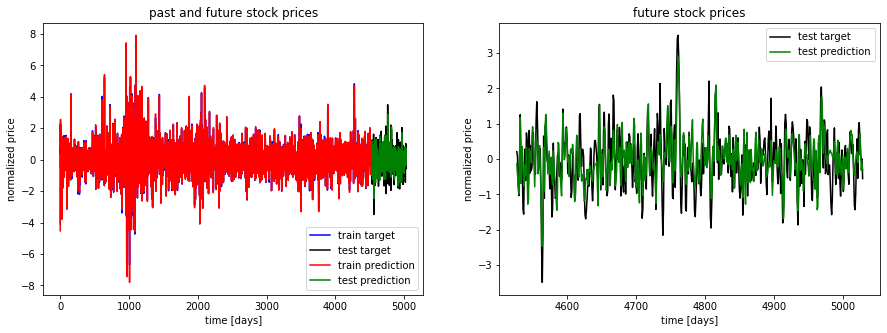

In [41]:
## show predictions
plt.clf()
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,0], color='blue', label='train target')

# validation part 제외
# plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,0],
#          color='gray', label='valid target')

# plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
#                    y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
#          y_test[:,0], color='black', label='test target')
plt.plot(np.arange(y_train.shape[0],
                   y_train.shape[0]+y_test.shape[0]),
         y_test[:,0], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,0], color='red',
         label='train prediction')

# validation part 제외
# plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
#          y_valid_pred[:,0], color='orange', label='valid prediction')

# plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
#                    y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
#          y_test_pred[:,0], color='green', label='test prediction')
plt.plot(np.arange(y_train_pred.shape[0],
                   y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,0], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,0], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,0], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

##### Metric

In [42]:
# metric 구성
class CustomMetric():

    def __init__(self, pred, real):
            self.pred = pred
            self.real = real
            self.thr25 = np.percentile(self.real, 25)
            self.thr75 = np.percentile(self.real, 75)
            self.df = pd.DataFrame({'pred' : self.pred, 'real' : self.real})
        
    def issame(self, data1, data2):
        if data1 > 0 and data2 > 0 : 
            return 'T'
        elif data1 > 0 and data2 < 0 :
            return 'F'
        elif data1 < 0 and data2 > 0 :
            return 'F'
        elif data1 < 0 and data2 < 0 :
            return 'T'
        elif data1 == 0 or data2 == 0 :
            return 0
        else :
            return 'notcal'

    def getouter(self, data1, data2): #quantile_25 = np.percentile(values, 25)

        if data1 > 0 and data2 >= self.thr75 :
            return 'T'
        elif data1 < 0 and data2 <= self.thr25 :
            return 'T'
        elif data1 >= 0 and data2 <= self.thr25 :
            return 'F'
        elif data1 <= 0 and data2 >= self.thr75: 
            return 'F'
        else:
            return 'notcal'
        
    # percentile 값은 새로운 값이 들어올 때마다 변경해줘야하는 것은 아닌지?
    def makedf(self, variable_test = 0):
        self.df['TF'] = self.df.apply(lambda x : self.issame(x['pred'], x['real']), axis = 1)
        self.df['thrTF'] = self.df.apply(lambda x : self.getouter(x['pred'], x['real']), axis = 1)
        
        # 상승 하락을 맞췄는지 check
        if variable_test == 1:
            self.df['variable_TF'] = self.df['TF'].apply(lambda x : 1 if x == 'T' else 0)
        return self.df
        
    def execution(self):
        mdf = pd.DataFrame()
        mdf['CORR'] = [self.df['real'].corr(self.df['pred'], method = 'pearson')]
        mdf['R2'] = ["{0:0.4f}".format(r2_score(self.df['real'], self.df['pred']))]
        mdf['MAE'] = ["{0:0.4f}".format(mean_absolute_error(self.df['pred'], self.df['real']))]
        mdf['RMSE'] = ["{0:0.4f}".format(np.sqrt(mean_squared_error(self.df['pred'], self.df['real'])))]
        mdf['ACR'] = [sum(self.df['TF'] == 'T')/len(self.df['TF'])]
        
        mdf['threshACR'] = [sum(self.df['thrTF'] == 'T') / sum(self.df['thrTF'] != 'notcal')]
        
        return mdf     

In [43]:
tmp_y_test_pred = []
for element in y_test_pred:
    tmp_y_test_pred.append(float(element))
y_test_pred = tmp_y_test_pred

tmp_y_test = []
for element in y_test:
    tmp_y_test.append(float(element))
y_test = tmp_y_test

In [44]:
y_test_pred_metric = y_test_pred
y_test_metric = y_test

metric = CustomMetric(y_test_pred_metric, y_test_metric)
metric

In [45]:
metric.makedf(variable_test = 1)

,pred,real,TF,thrTF,variable_TF
0,-0.139921,0.209258,F,notcal,0
1,-0.434660,0.068623,F,notcal,0
2,-0.640988,-0.726883,T,T,1
3,-0.989002,-1.031699,T,T,1
4,-0.006488,0.008258,F,notcal,0
...,...,...,...,...,...
498,0.725567,0.562991,T,T,1
499,0.344356,0.124605,T,notcal,1
500,-0.313348,-0.026699,T,notcal,1
501,-0.131643,0.008258,F,notcal,0


In [46]:
feature_selected_final

['Micron_change',
 'SamsungElectronics_change',
 'Sumco_change',
 'KRXsemiconductor_change',
 'TokyoElectron_close',
 'Google_product',
 'Dell_volume',
 'TokyoElectron_change',
 'Siltronic_volume',
 'Nvidia_product',
 'Dell_product',
 'Dell_close',
 'KOSPI200_volume',
 'KOSPI200_close',
 'UMC_volume',
 'Philadelphia_volume',
 'Nvidia_volume',
 'QCOM_close',
 'ShinEtsuChemical_change',
 'Amazon_volume',
 'Facebook_change',
 'Intel_volume',
 'USDollarIndex_change',
 'TSMC_change',
 'AMD_change',
 'LamResearch_change',
 'Intel_change',
 'EUR_KRW_change',
 'JPY_KRW_change',
 'APPLE_volume',
 'SKhynix_product',
 'Micron_volume',
 'Microsoft_volume',
 'Microsoft_product',
 'Microsoft_close',
 'Philadelphia_product',
 'AppliedMaterials_product',
 'TSMC_volume',
 'Amazon_product',
 'AMD_product',
 'EUR_KRW_volume',
 'JPY_KRW_volume',
 'USDollarIndex_volume',
 'USD_KRW_volume',
 'LamResearch_product',
 'TokyoElectron_product',
 'Siltronic_product',
 'APPLE_product',
 'Micron_product',
 'TSMC_pr

In [47]:
metric.execution()

,CORR,R2,MAE,RMSE,ACR,threshACR
0,0.73466,0.5375,0.4499,0.5615,0.717694,0.861111


In [48]:
print('seq_len :', seq_len)
print('n_inputs :', n_inputs)
print('n_neurons :', n_neurons)
print('n_layers :', n_layers)
print('learning_rate :', learning_rate)
print('batch_size :', batch_size)
print('n_epochs :', n_epochs)

seq_len : 20
n_inputs : 54
n_neurons : 270
n_layers : 2
learning_rate : 0.001
batch_size : 50
n_epochs : 100


##### 변수 중요도 추출

변수 중요도 추출을 위해 training data를 활용, 상승과 하락을 맞추거나 틀린 두 가지 classification을 적용

In [49]:
tmp_y_train_pred = []
for element in y_train_pred:
    tmp_y_train_pred.append(float(element))
y_train_pred = tmp_y_train_pred

tmp_y_train = []
for element in y_train:
    tmp_y_train.append(float(element))
y_train = tmp_y_train

In [50]:
y_train_pred_metric = y_train_pred
y_train_metric = y_train

train_metric = CustomMetric(y_train_pred_metric, y_train_metric)
train_metric

In [51]:
train_metric.makedf(variable_test=1)

,pred,real,TF,thrTF,variable_TF
0,-4.523793,-4.084679,T,T,1
1,-1.321889,-1.063742,T,T,1
2,2.096635,2.169736,T,T,1
3,0.703863,0.407345,T,notcal,1
4,2.560814,2.329953,T,T,1
...,...,...,...,...,...
4522,-0.124482,-0.064732,T,notcal,1
4523,0.257201,0.235475,T,notcal,1
4524,-0.296052,-0.288873,T,notcal,1
4525,-0.824433,-0.869501,T,T,1


In [52]:
tmp_list = []
for i, row in df_stock_norm.iterrows():
    tmp_list.append(list(row))

In [53]:
X_list = tmp_list

In [54]:
train_metric.df

,pred,real,TF,thrTF,variable_TF
0,-4.523793,-4.084679,T,T,1
1,-1.321889,-1.063742,T,T,1
2,2.096635,2.169736,T,T,1
3,0.703863,0.407345,T,notcal,1
4,2.560814,2.329953,T,T,1
...,...,...,...,...,...
4522,-0.124482,-0.064732,T,notcal,1
4523,0.257201,0.235475,T,notcal,1
4524,-0.296052,-0.288873,T,notcal,1
4525,-0.824433,-0.869501,T,T,1


In [55]:
X_train_list = X_list[seq_len-2:train_size]
Y_train_list = list(train_metric.df['variable_TF'])
X_test_list = X_list[train_size+2:]
Y_test_list = list(metric.df['variable_TF'])

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rf = RandomForestClassifier(n_estimators=10).fit(X_train_list, Y_train_list)
cross_val_score(rf, X_train_list, Y_train_list, cv=3)
rf.score(X_test_list, Y_test_list)
print(classification_report(Y_test_list, rf.predict(X_test_list)))

feature_importance_rf = pd.DataFrame(zip(df_stock_norm.columns.values, rf.feature_importances_))
feature_importance_rf.columns = ['feature', 'importance']
feature_importance_rf.sort_values("importance", ascending=False, inplace=True)

              precision    recall  f1-score   support

           0       0.30      0.39      0.34       142
           1       0.73      0.63      0.68       361

    accuracy                           0.56       503
   macro avg       0.51      0.51      0.51       503
weighted avg       0.60      0.56      0.58       503



In [57]:
feature_importance_rf

,feature,importance
35,UMC_volume,0.045524
46,Micron_product,0.038339
49,Philadelphia_product,0.036428
40,AMD_product,0.033177
22,Microsoft_close,0.029324
21,Micron_change,0.027837
24,Nvidia_volume,0.027792
18,KRXsemiconductor_change,0.026812
32,TokyoElectron_change,0.026546
37,USDollarIndex_change,0.025577


In [58]:
# 반복적 변수 제거 방식을 이용한 변수별 중요도 도출
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=5, random_state=42), n_features_to_select = 5)
select.fit(X_train_list, Y_train_list)

feature_importance_rfe = pd.DataFrame(zip(df_stock_norm.columns.values, select.get_support()))
feature_importance_rfe.columns = ['feature', 'importance']
feature_importance_rfe.sort_values("importance", ascending=False, inplace=True)

In [59]:
feature_importance_rfe

,feature,importance
34,TSMC_change,True
35,UMC_volume,True
46,Micron_product,True
44,Google_product,True
18,KRXsemiconductor_change,True
0,Amazon_volume,False
39,Amazon_product,False
30,Sumco_change,False
31,TokyoElectron_close,False
32,TokyoElectron_change,False
